In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import joblib

In [5]:
!pip install xgboost --quiet


In [2]:
from xgboost import XGBClassifier

In [3]:
# Load dataset
data = pd.read_csv(r"C:\Users\asus\Desktop\Masters Project & Thesis\Master Projects\Churn Marketing project\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [4]:
# 3. Quick look at data
print("Shape:", data.shape)
print(data.info())
print(data.head())

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [5]:
# 4. Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# 5. Convert TotalCharges to numeric (it has some blanks)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_14484\2316031066.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [7]:
# 6. Encode target variable 'Churn'
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])  # Yes = 1, No = 0

In [8]:
# 7. Drop unnecessary columns
data.drop(['customerID'], axis=1, inplace=True)

In [9]:
# 8. Handle categorical features (One-Hot Encoding)
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [10]:

# 9. Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

In [11]:
# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 11. Train XGBoost model
model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
# 12. Predictions
y_pred = model.predict(X_test)

In [14]:
# 13. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.808374733853797

Confusion Matrix:
 [[934 102]
 [168 205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



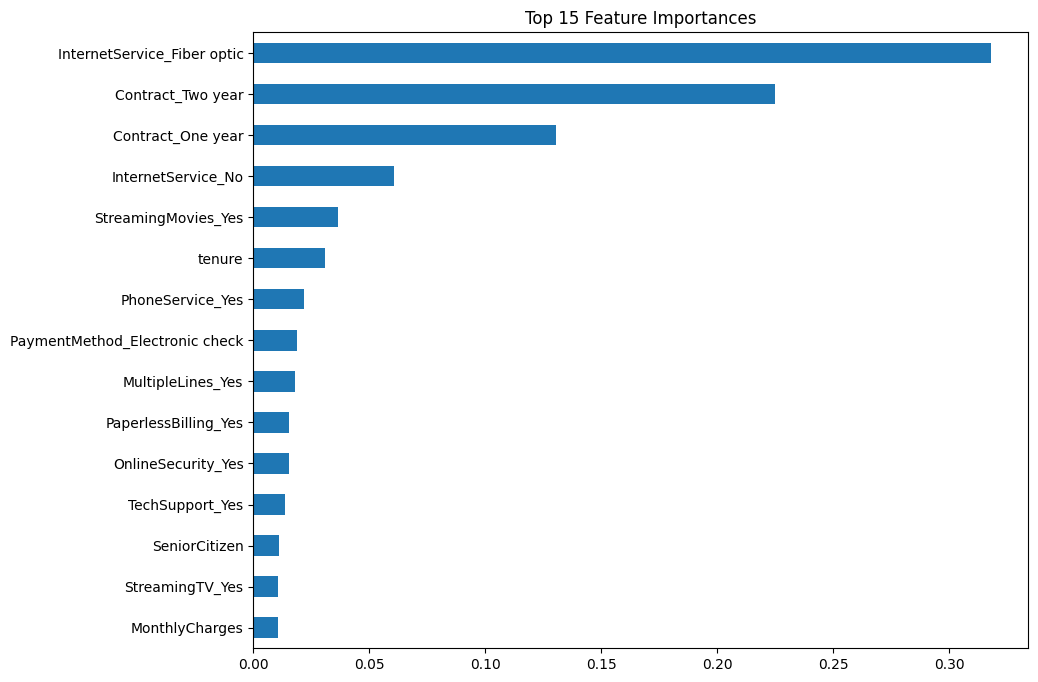

In [15]:
# 14. Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,8))
importances.sort_values(ascending=True).tail(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.show()

In [16]:
# 15. Save the model
joblib.dump(model, 'churn_model.pkl')
print("✅ Model saved as churn_model.pkl")

✅ Model saved as churn_model.pkl
